# Lineare Regression 

In [147]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import plot_tree
import os as os



#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import missingno as msno


# Daten einlesen

In [189]:
from pathlib import Path

URL = (
    "https://data.milwaukee.gov/dataset/7a8b81f6-d750-4f62-aee8-30ffce1c64ce/resource/f083631f-e34e-4ad6-aba1-d6d7dd265170/download/2002-2018-property-sales-data.csv"
)
data = Path("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv")

In [190]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv") 
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


In [191]:
data = data.drop(columns=['Year_Built'])

In [192]:
data = data.drop(columns=['Sale_date'])


In [158]:
data.head(10)

,Unnamed: 0,PropType,District,Style,Fin_sqft,Fbath,Lotsize,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1620.0,2,7800.0,148500,3900.0,73,0
1,9,Residential,13,Ranch,986.0,1,10428.0,105000,10428.0,68,0
2,63,Residential,9,Colonial,2237.0,2,11129.0,257000,5564.5,17,0
3,77,Residential,1,Colonial,1470.0,2,5945.0,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1456.0,1,5590.0,120900,5590.0,70,0
5,79,Residential,2,Ranch,1379.0,1,8190.0,129900,8190.0,58,0
6,80,Residential,2,Ranch,1361.0,1,5750.0,126500,5750.0,62,0
7,81,Residential,2,Ranch,1334.0,1,5544.0,109000,5544.0,60,0
8,82,Residential,2,Ranch,1334.0,1,5250.0,108000,5250.0,62,0
9,83,Residential,2,Ranch,1288.0,2,5400.0,115000,2700.0,65,0


# Explorative Daten Analyse

In [194]:
def missing_percent(data):
  nan_percent=((data.inull().sum())/len(data))*100
  nan_percent=nan_percent[nan_percent>0].sort_values()
  return nan_percent

In [195]:
data.isnull().sum()

Unnamed: 0            0
PropType              0
District              0
Style                 0
Fin_sqft              0
Fbath                 0
Lotsize               0
Sale_price            0
Fläche_pro_Bad      209
Immobilien_Alter      0
Premium               0
dtype: int64

In [196]:
def missing_percent(df):
  nan_percent=((data.isnull().sum())/len(data))*100
  nan_percent=nan_percent[nan_percent>0].sort_values()
  return nan_percent

In [197]:
nan_percent=missing_percent(data)
print(nan_percent)

Fläche_pro_Bad    2.273716
dtype: float64


<Axes: >

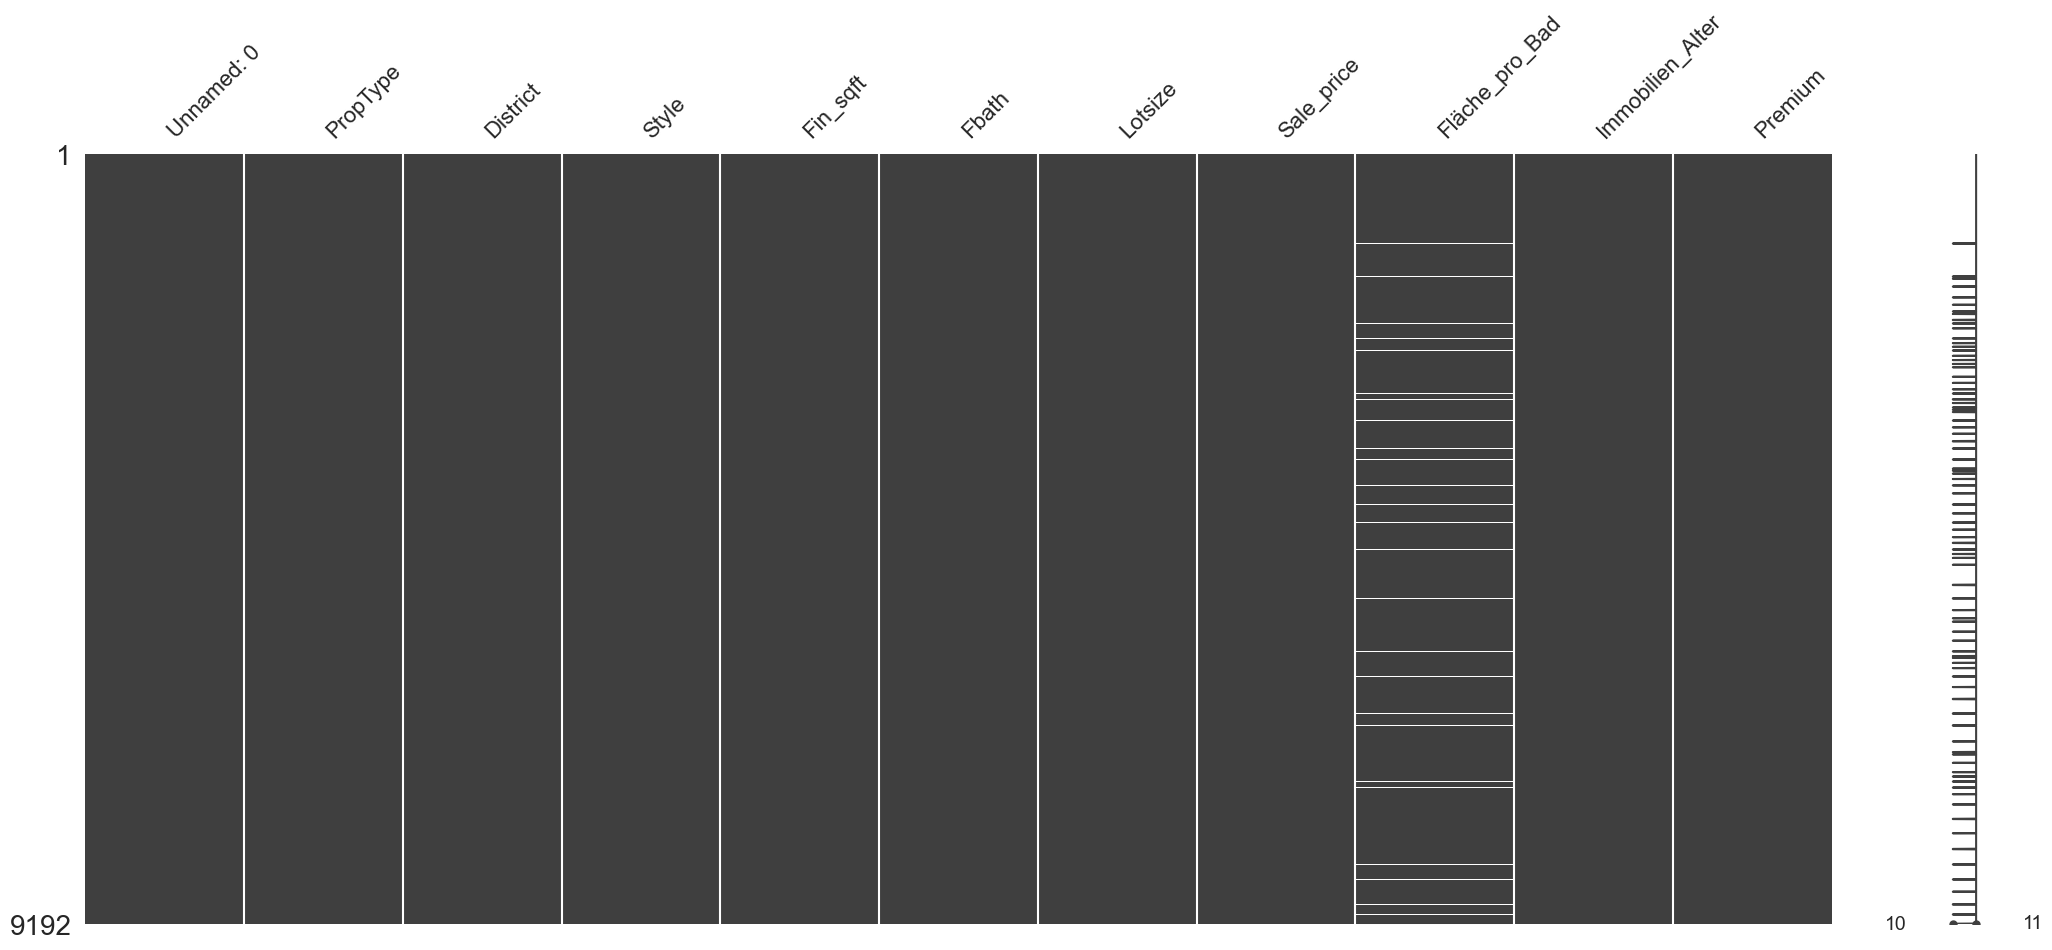

In [198]:
data = data.replace("", np.nan)
msno.matrix(data)

In [201]:
data.sort_values(['Immobilien_Alter'],ascending=True).groupby('Premium').head(30)

,Unnamed: 0,PropType,District,Style,Fin_sqft,Fbath,Lotsize,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
9106,9510,Residential,5,Ranch,2244.0,2,8775.0,327300,4387.500000,6,0
8338,8707,Residential,5,Colonial,2184.0,2,9006.0,388400,4503.000000,6,0
7505,7841,Residential,5,Colonial,2282.0,2,10188.0,298200,5094.000000,7,0
7166,7489,Residential,5,Colonial,2187.0,0,9991.0,312800,NaN,7,0
7164,7487,Residential,5,Colonial,2319.0,2,12008.0,326305,6004.000000,7,0
7506,7842,Residential,5,Colonial,2138.0,2,8786.0,308800,4393.000000,7,0
9000,9398,Residential,6,Colonial,1716.0,2,2746.0,379900,1373.000000,7,0
7026,7345,Residential,5,Colonial,3152.0,3,10001.0,331500,3333.666667,7,0
8446,8815,Residential,12,Colonial,2016.0,3,5632.0,126000,1877.333333,7,0
6243,6539,Residential,3,Colonial,1877.0,2,2500.0,340250,1250.000000,8,0


In [202]:
data[['Immobilien_Alter', 'District']].groupby(['Immobilien_Alter'], as_index=False).median().sort_values(by='District', ascending=False)


,Immobilien_Alter,District
3,9,13.0
27,33,13.0
6,12,12.0
32,38,12.0
51,57,11.0
...,...,...
25,31,5.0
1,7,5.0
66,72,5.0
2,8,5.0


In [218]:
import pandas as pd

data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv") 
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


In [219]:
data['Fläche_pro_Bad'].fillna(data['Fläche_pro_Bad'].median(),inplace = True)

In [220]:
# Definieren der numerischen Spalten, die skaliert werden sollen
num_features = ['Fin_sqft', 'Fbath', 'Lotsize', 'Sale_price', 'Fläche_pro_Bad', 'Immobilien_Alter']

# Definieren der kategorialen Spalten für das One-Hot-Encoding
cat_features = ['PropType', 'District', 'Style', 'Premium']

In [221]:
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


In [222]:
data = pd.get_dummies(data, columns= [ "PropType", "District", "Style", "Premium" ]) # Kategorische Variablen werden in ein Format transforiert, das quantiative Algorithmen besser nutzen können. 

In [223]:
data.head(10)

,Unnamed: 0,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,PropType_Lg Apartment,...,Style_Cottage,Style_Duplex N/S,Style_Ranch,Style_Residence O/S,Style_Split Level,Style_Townhouse,Style_Triplex,Style_Tudor,Premium_0,Premium_1
0,8,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,...,0,0,0,0,0,0,0,0,1,0
1,9,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,...,0,0,1,0,0,0,0,0,1,0
2,63,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,...,0,0,0,0,0,0,0,0,1,0
3,77,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,...,0,0,0,0,0,0,0,0,1,0
4,78,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,...,0,0,0,0,0,0,0,0,1,0
5,79,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,...,0,0,1,0,0,0,0,0,1,0
6,80,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,...,0,0,1,0,0,0,0,0,1,0
7,81,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,...,0,0,1,0,0,0,0,0,1,0
8,82,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,...,0,0,1,0,0,0,0,0,1,0
9,83,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,...,0,0,1,0,0,0,0,0,1,0


In [172]:
#df['alter'].fillna(df['alter'].median(),inplace = True)

In [173]:
#df.isnull().sum()

In [252]:
for col in data.columns:
    print(f"{col}:\n{data[col].unique()}\n")

Year_Built:
[1951 1956 2007 2004 1954 1966 1962 1964 1959 1950 1953 1957 1955 1958
 1965 1980 1952 1992 1961 1979 1967 1960 1972 1976 1988 1970 1974 1984
 1968 1997 1978 2008 1971 1990 1963 2002 1969 1993 1986 2000 1982 1975
 2001 2009 1981 1977 1987 1996 2003 2005 2006 1985 1973 1983 1998 1989
 2010 1995 2011 1994 1999 2012 1991 2013 2014 2015 2016 2017 2018]

Fin_sqft:
[1620.  986. 2237. ...  765.  817. 3756.]

Fbath:
[2 1 3 4 0 5]

Lotsize:
[ 7800. 10428. 11129. ... 13770.  8278.  4182.]

Sale_date:
['2003-12' '2007-08' '2009-01' '2009-02' '2009-03' '2009-04' '2009-05'
 '2009-06' '2009-07' '2009-08' '2009-09' '2009-10' '2009-11' '2009-12'
 '2010-01' '2010-02' '2010-03' '2010-04' '2010-05' '2010-06' '2010-07'
 '2010-08' '2010-09' '2010-10' '2010-11' '2010-12' '2011-01' '2011-02'
 '2011-03' '2011-04' '2011-05' '2011-06' '2011-07' '2011-08' '2011-09'
 '2011-10' '2011-11' '2011-12' '2012-01' '2012-02' '2012-03' '2012-04'
 '2012-05' '2012-06' '2012-07' '2012-08' '2012-09' '2012-10' '2012

Skalierung & Normalisierung

In [253]:
data.head(10)

,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,PropType_Lg Apartment,PropType_Residential,...,Style_Cottage,Style_Duplex N/S,Style_Ranch,Style_Residence O/S,Style_Split Level,Style_Townhouse,Style_Triplex,Style_Tudor,Premium_0,Premium_1
0,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,1,...,0,0,0,0,0,0,0,0,1,0
5,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,1,...,0,0,1,0,0,0,0,0,1,0
6,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,1,...,0,0,1,0,0,0,0,0,1,0
7,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,1,...,0,0,1,0,0,0,0,0,1,0
8,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,1,...,0,0,1,0,0,0,0,0,1,0
9,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,1,...,0,0,1,0,0,0,0,0,1,0


In [254]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import missingno as msno


# Vorverarbeitung definieren
numeric_features = ['Fin_sqft', 'Fbath', 'Lotsize', 'Sale_price', 'Fläche_pro_Bad', 'Immobilien_Alter']
categorical_features = ['PropType', 'District', 'Style', 'Premium']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [255]:
# Vorverarbeitung und Aufteilung in Trainings- und Testdaten
X = data.drop('Sale_price', axis=1)
y = data['Sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [246]:
data.head(10)

,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,PropType_Lg Apartment,PropType_Residential,...,Style_Cottage,Style_Duplex N/S,Style_Ranch,Style_Residence O/S,Style_Split Level,Style_Townhouse,Style_Triplex,Style_Tudor,Premium_0,Premium_1
0,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0,1,...,0,0,0,0,0,0,0,0,1,0
5,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0,1,...,0,0,1,0,0,0,0,0,1,0
6,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0,1,...,0,0,1,0,0,0,0,0,1,0
7,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0,1,...,0,0,1,0,0,0,0,0,1,0
8,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0,1,...,0,0,1,0,0,0,0,0,1,0
9,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [259]:
data = pd.read_csv("/Users/knaflhei/Documents/DBUSA/data/subset_wohnraum_final.csv")

In [260]:
data.head(10)

,Unnamed: 0,PropType,District,Style,Year_Built,Fin_sqft,Fbath,Lotsize,Sale_date,Sale_price,Fläche_pro_Bad,Immobilien_Alter,Premium
0,8,Residential,1,Cape Cod,1951,1620.0,2,7800.0,2003-12,148500,3900.0,73,0
1,9,Residential,13,Ranch,1956,986.0,1,10428.0,2003-12,105000,10428.0,68,0
2,63,Residential,9,Colonial,2007,2237.0,2,11129.0,2007-08,257000,5564.5,17,0
3,77,Residential,1,Colonial,2004,1470.0,2,5945.0,2009-01,107500,2972.5,20,0
4,78,Residential,2,Cape Cod,1954,1456.0,1,5590.0,2009-01,120900,5590.0,70,0
5,79,Residential,2,Ranch,1966,1379.0,1,8190.0,2009-01,129900,8190.0,58,0
6,80,Residential,2,Ranch,1962,1361.0,1,5750.0,2009-01,126500,5750.0,62,0
7,81,Residential,2,Ranch,1964,1334.0,1,5544.0,2009-01,109000,5544.0,60,0
8,82,Residential,2,Ranch,1962,1334.0,1,5250.0,2009-01,108000,5250.0,62,0
9,83,Residential,2,Ranch,1959,1288.0,2,5400.0,2009-01,115000,2700.0,65,0


In [267]:
# Angenommen, X ist Ihr ursprünglicher DataFrame ohne die Spalte 'Sale_price'
X['Year'] = pd.to_datetime(X['Sale_date']).dt.year
X['Month'] = pd.to_datetime(X['Sale_date']).dt.month
X['Day'] = pd.to_datetime(X['Sale_date']).dt.day

# Entfernen der ursprünglichen 'Sale_date' Spalte, nachdem die Merkmale extrahiert wurden
X = X.drop('Sale_date', axis=1)

## Lineare Regression

Zielvariable definieren

In [268]:
y = data['Sale_price'].copy()
X = data.drop('Sale_price', axis=1)

Numerische und Kategorische Features definieren

In [269]:

numeric_features = ['Fin_sqft', 'Fbath', 'Lotsize', 'Fläche_pro_Bad', 'Immobilien_Alter']
categorical_features = ['PropType', 'District', 'Style', 'Premium']



Pipeline für numerische und kategorische Features

In [270]:
# Pipeline für numerische Features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Pipeline für kategoriale Features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])



Zusammenführen der Vorverarbeitungsschritte in einem ColumTransformer

In [271]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



Anwendung der Vorverarbeitung auf dauf Feature Daten 

In [272]:
X_preprocessed = preprocessor.fit_transform(X)



Aufteilen in Trainings- und Testdaten 

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

Testen der Daten 

In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialisierung des Modells
model = LinearRegression()

# Trainieren des Modells mit den Trainingsdaten
model.fit(X_train, y_train)

# Vorhersagen mit den Testdaten
y_pred = model.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 821641119.1830428
R^2 Score: 0.6305260493711125


Interpretation: 

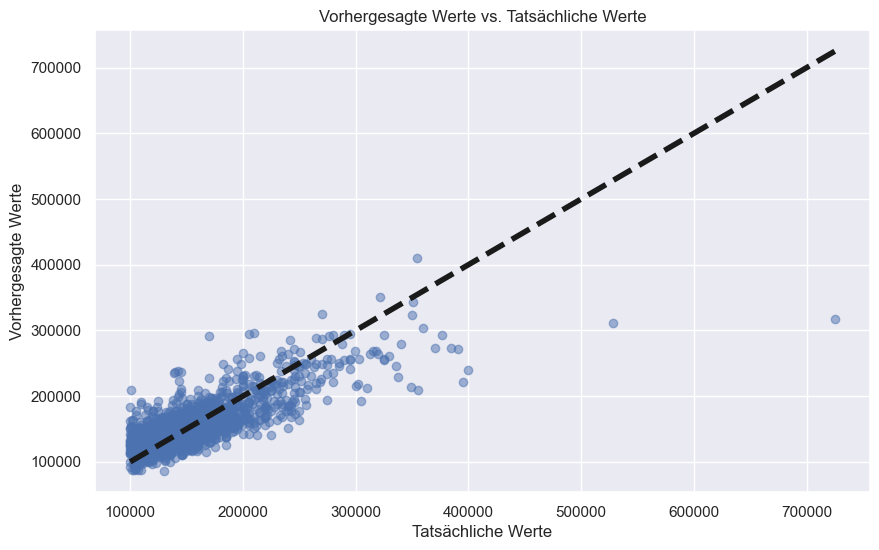

In [276]:
import matplotlib.pyplot as plt

# Angenommen, y_test sind Ihre tatsächlichen Werte und y_pred sind die vom Modell vorhergesagten Werte
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Vorhergesagte Werte vs. Tatsächliche Werte')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonale Linie
plt.show()

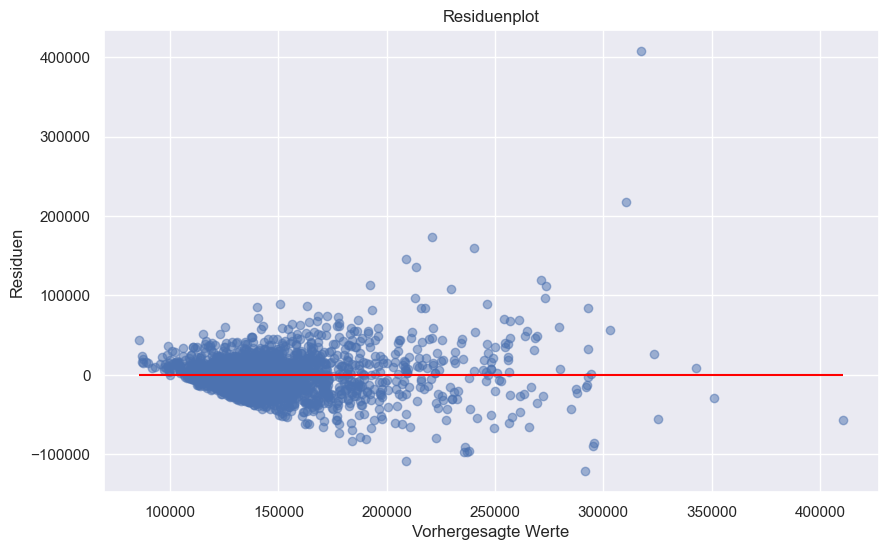

In [277]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuen')
plt.title('Residuenplot')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.show()

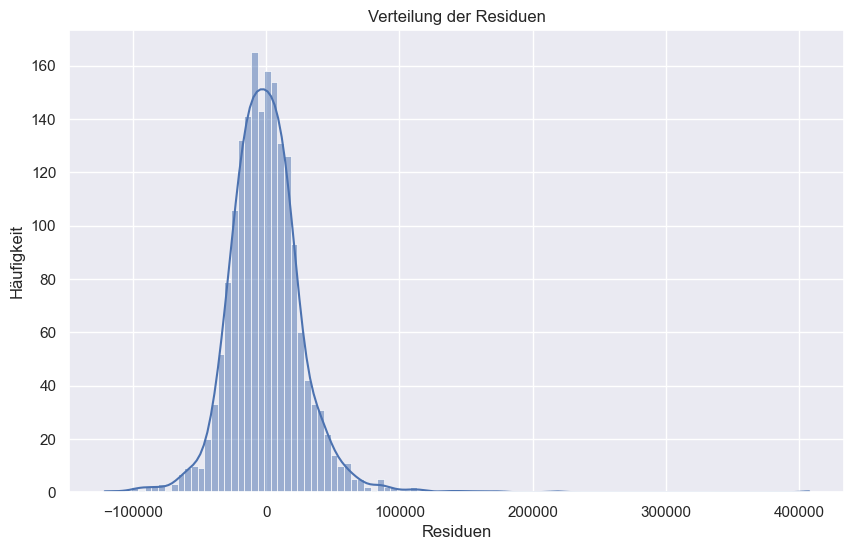

In [278]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Residuen')
plt.show()

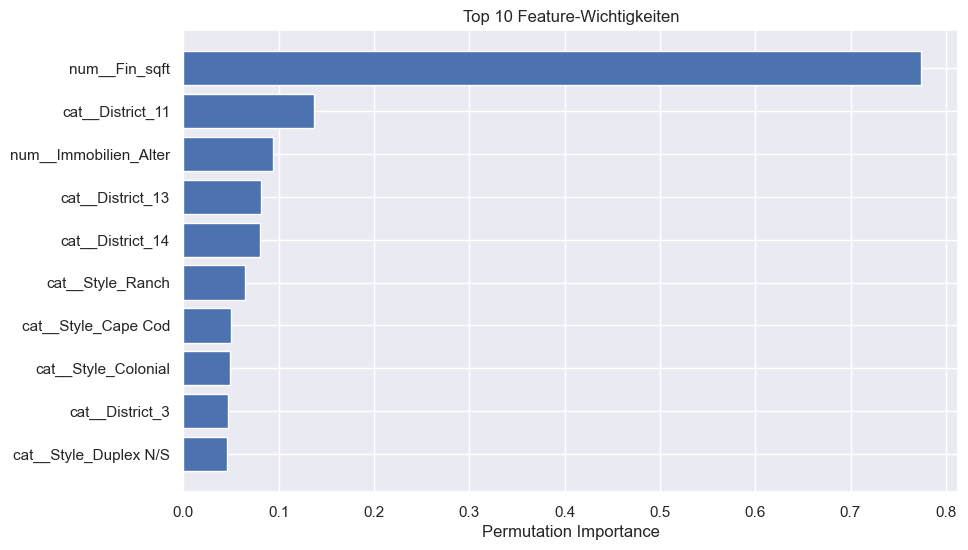

In [283]:
N = 10  # Anzahl der Features, die Sie anzeigen möchten

# Sortieren der Feature-Importanzen und Auswahl der Top-N
sorted_idx = perm_importance.importances_mean.argsort()[-N:]

plt.figure(figsize=(10, 6))
plt.barh(range(N), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(N), [transformed_feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title(f'Top {N} Feature-Wichtigkeiten')
plt.show()

## Hyperparameter Tuning Lineare Regression

Hyperparameter Tuning log-Reg model

In [389]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definieren des Modells
ridge = Ridge()

# Parameter, die getuned werden sollen
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Grid Search Initialisierung
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Training
ridge_regressor.fit(X_train, y_train)

# Beste Parameter ausgeben
print("Beste Parameter:", ridge_regressor.best_params_)
print("Bestes Modell Score (neg_mean_squared_error):", ridge_regressor.best_score_)

Beste Parameter: {'alpha': 1}
Bestes Modell Score (neg_mean_squared_error): -787778732.339701


In [404]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generieren von Beispieldaten
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definieren des Parameter-Rasters
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],  # Regularisierungsstärke
}

# Erstellen des Ridge-Modells
ridge = Ridge()

# Durchführen der Grid-Suche
grid_search = GridSearchCV(ridge, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Ausgabe des besten Scores
print(f"Best score from grid search: {grid_search.score(X_test, y_test):.3f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................

In [390]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ["newton-cg","lbfgs", "liblinear", "sag", "saga"],
    'max_iter' :[100,150,200],
}


grid_search = GridSearchCV(logreg, param_grid, cv=3, verbose= 2 , n_jobs = -1)
grid_search.fit(X_train,y_train)

print(("best Logistic Regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END .....................max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END .....................max_iter=100, solver=newton-cg; total time=   0.0s[CV] END .........................max_iter=100, solver=lbfgs; total time=   0.0s

[CV] END .........................max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .........................max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END .....................max_iter=100, solver=liblinear; total time=   0.0s
[CV] END .....................max_iter=100, solver=newton-cg; total time=   0.0s
[CV] END .....................max_iter=100, solver=liblinear; total time=   0.0s
[CV] END .....................max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...........................max_iter=100, solver=sag; total time=   0.0s
[CV] END ...........................max_iter=100, solver=sag; total time=   0.0s
[CV] END ...........................max_iter=100, solver=sag; total time=   0.0s
[CV] END ...................

/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=100, solver=saga; total time= 3.6min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=100, solver=saga; total time= 3.7min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=100, solver=saga; total time= 3.7min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=150, solver=saga; total time= 5.2min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=150, solver=saga; total time= 5.3min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=150, solver=saga; total time= 5.3min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=200, solver=saga; total time= 6.5min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........................max_iter=200, solver=saga; total time= 6.5min


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
36 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/ads-ml-full/lib

[CV] END ..........................max_iter=200, solver=saga; total time= 4.8min
best Logistic Regression from grid search: 0.024


/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [391]:
grid_search.best_params_

{'max_iter': 100, 'solver': 'saga'}

Use Grid search for best hyperparameters

In [405]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
params = {
    'max_leaf_nodes' : [3,5,9],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator=tree,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")



In [406]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


ValueError: 
All the 600 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 959, in fit
    super()._fit(
  File "/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 284, in _fit
    check_classification_targets(y)
  File "/Applications/anaconda3/envs/ads-ml-full/lib/python3.11/site-packages/sklearn/utils/multiclass.py", line 216, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [397]:
score_df = pd.DataFrame(grid_search.cv_results_)
print(score_df)
grid_search.best_params_

     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.034711      0.003819         0.027865        0.003099   
1         0.028673      0.000466         0.029835        0.001442   
2         0.032385      0.001018         0.012411        0.000554   
3         0.029124      0.000836         0.011160        0.000732   
4         0.025776      0.000417         0.010999        0.000781   
..             ...           ...              ...             ...   
145       0.617956      0.017870         0.012258        0.000850   
146       0.497415      0.022446         0.013072        0.001559   
147       0.483722      0.016057         0.012757        0.000966   
148       0.451056      0.011560         0.011385        0.001155   
149       0.328090      0.023407         0.009277        0.000670   

    param_criterion param_max_depth param_max_leaf_nodes  \
0              gini               2                    3   
1              gini               2                

{'criterion': 'entropy',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 5}

<font size="4">**Interpretation des Modells**</font>

Um die Funktionsweise des Baums zusammenzufassen wird hier *Feature importance* betrachtet. Es zeigt, wie wichtig jedes Feature für die Entscheidung des Baums ist. Wenn ein Feature eine niedrige feature_importance hat, bedeutet das jedoch nicht, dass dieses Feature uninformativ ist. Es bedeutet nur, dass das Feature vom Baum nicht ausgewählt wurde, wahrscheinlich weil ein anderes Feature die gleiche Information kodiert.

In vorliegenden Fall sind fünf Features wichtig für den Baum, die auch in den folgenden Abbildungen zu sehen sind.

In [401]:
feature_imp = pd.Series(tree.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
pd.DataFrame({'feature importances':feature_imp.values},
             index=feature_imp.index)

ValueError: Length of values (53) does not match length of index (11)

In [399]:
sns.barplot(x=feature_imp, y=feature_imp.index, color='#EE6666')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Abb:4 Important Features")
plt.show()

NameError: name 'feature_imp' is not defined

IndexError: index 15 is out of bounds for axis 0 with size 11

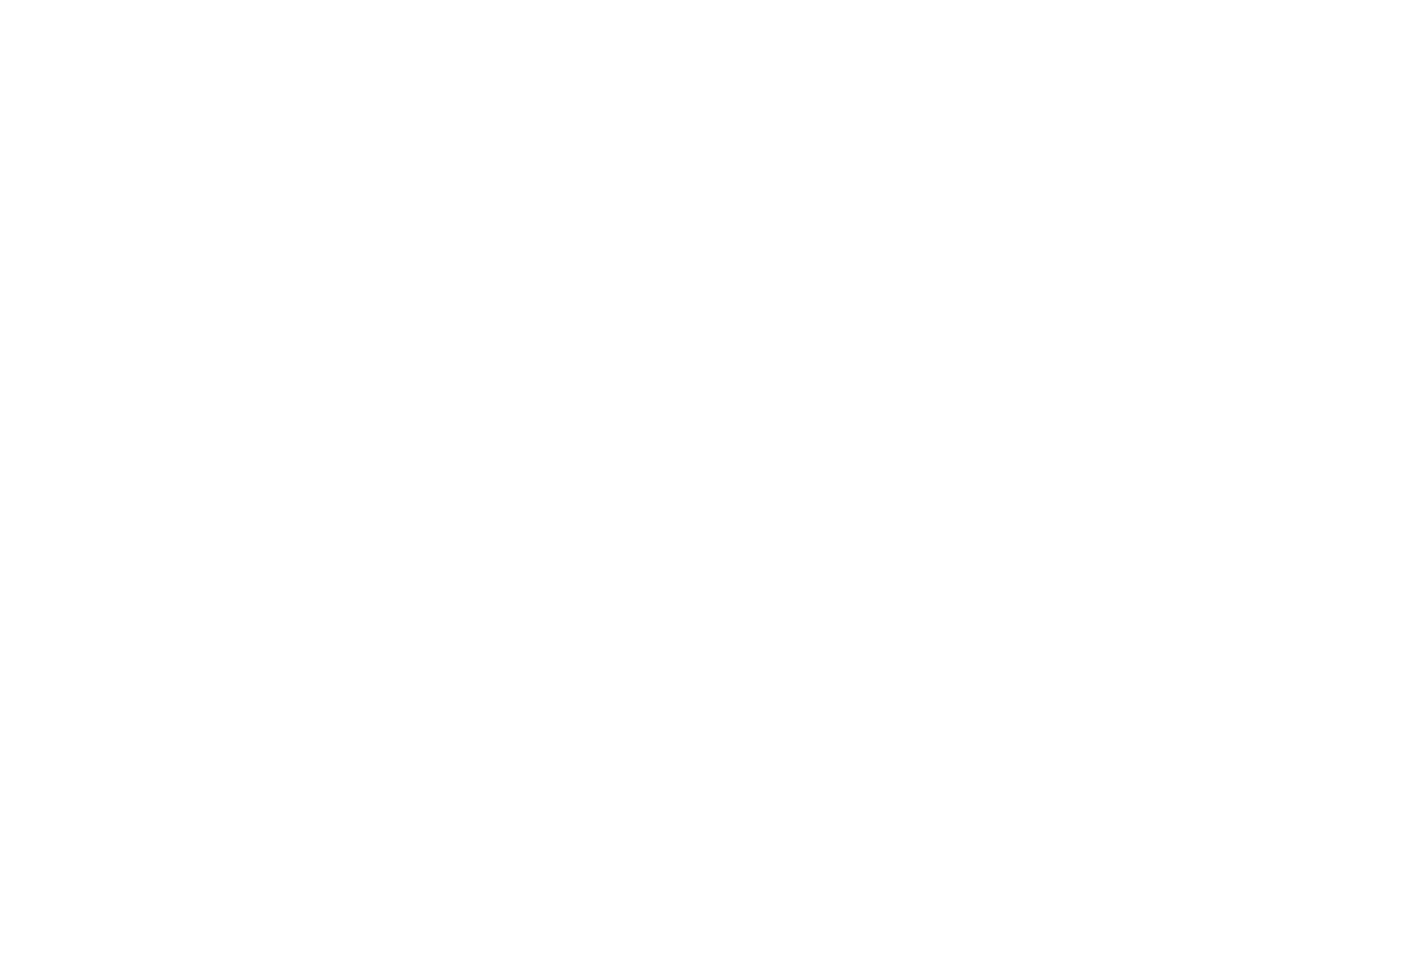

In [400]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8),dpi=150)
plot_tree(tree, filled=True, feature_names=X.columns)


In [ ]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix

array([[432,  67],
       [ 25, 608]])

Confusion matrix, without normalization
[[432  67]
 [ 25 608]]
Normalized confusion matrix
[[0.87 0.13]
 [0.04 0.96]]


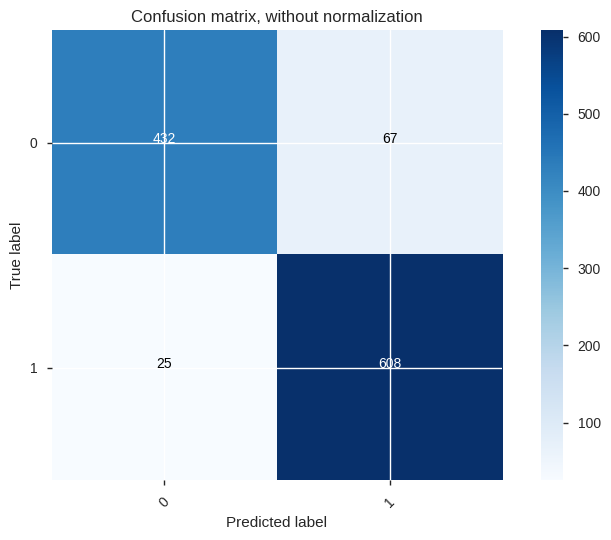

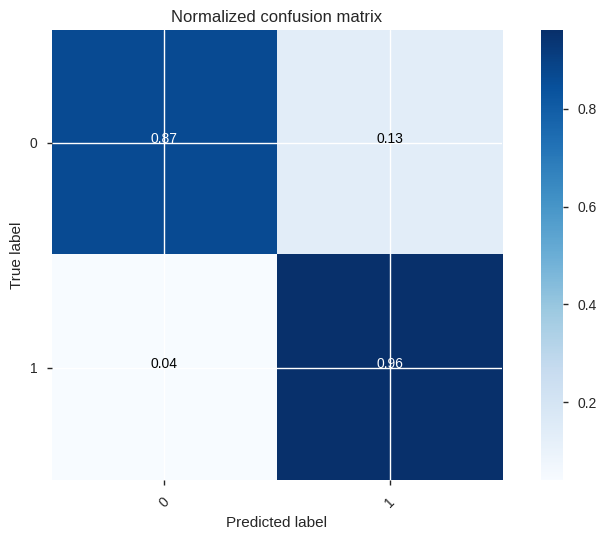

In [ ]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

##Random Forest

In [ ]:
# Import helpful packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

# Matplotlib setting for Jupyter Notebook
%matplotlib inline
plt.style.use('ggplot')

###scikit Learn Modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400,500, 700]}
gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9350748866982436
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                             n_estimators=500,
                             min_samples_split=2,
                             min_samples_leaf=5,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.9265


In [ ]:
forest = RandomForestClassifier(
    criterion='entropy', n_estimators=500, random_state=33)
forest.fit(X_train, y_train)
y_predicted_labels = forest.predict(X_test)

In [ ]:

print("Accuracy on training set: {:.4f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.9898
Accuracy on test set: 0.9443


In [ ]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted_labels)
np.set_printoptions(precision=2)
cnf_matrix


array([[455,  44],
       [ 19, 614]])

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# from sklearn.metrics import average_precision_score

# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_labels)
area = auc(recall, precision)
print( "Area Under PR Curve(AP): %0.2f" % area )

print( 'AP', average_precision_score(y_test, y_predicted_labels, average='weighted'))

Area Under PR Curve(AP): 0.96
AP 0.921906489011072


Confusion matrix, without normalization
[[455  44]
 [ 19 614]]
Normalized confusion matrix
[[0.91 0.09]
 [0.03 0.97]]


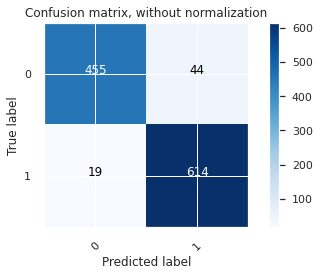

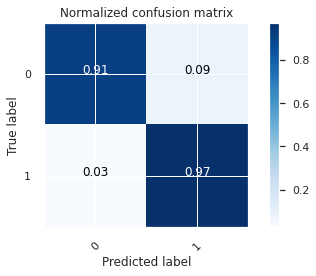

In [ ]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[455  44]
 [ 19 614]]
Normalized confusion matrix
[[0.91 0.09]
 [0.03 0.97]]


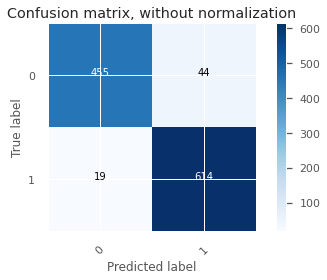

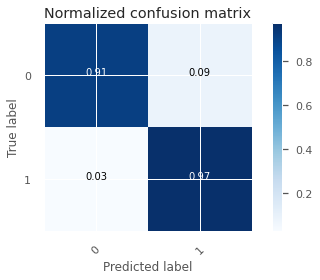

In [ ]:
#WithOUT Normalization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

# Matplotlib setting for Jupyter Notebook
%matplotlib inline
plt.style.use('ggplot')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[455  44]
 [ 19 614]]
Normalized confusion matrix
[[0.91 0.09]
 [0.03 0.97]]


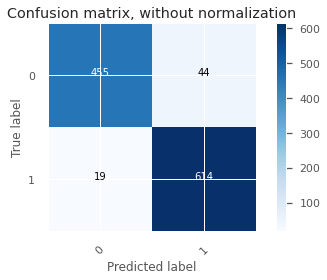

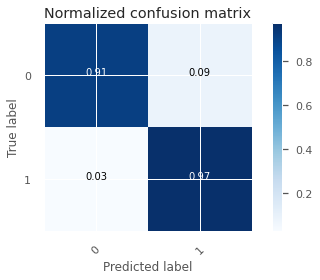

In [ ]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## XGBoost als Alternative zu Random Forest



In [ ]:
import xgboost as xgb

In [ ]:
xgb_m = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
# Booster parameter

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0 , 0.5, 1,  2, 5],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7, 10],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
        }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 101)

random_search = RandomizedSearchCV(xgb_m, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f622d5060d0>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=600,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.5, 1, 2, 5],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 7, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([14.79, 30.44, 24.  , 12.63, 25.98]), 'std_fit_time': array([0.09, 0.06, 0.09, 0.13, 2.37]), 'mean_score_time': array([0.23, 0.45, 0.3 , 0.23, 0.13]), 'std_score_time': array([0.06, 0.04, 0.  , 0.  , 0.04]), 'param_subsample': masked_array(data=[0.5, 0.7, 0.7, 0.7, 0.7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 1, 10, 10, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 7, 10, 4, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.3, 0.3, 0.01, 0.0001, 0.001],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0, 0, 5, 0.5, 2],
             mask=[Fals

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", eval_metric = 'auc',
random_state=33, n_estimators=500, learning_rate=0.2)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [ ]:
print("Accuracy on training set: {:.4f}".format(xgb_model.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(xgb_model.score(X_test, y_test)))

Accuracy on training set: 0.9546
Accuracy on test set: 0.9496


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# from sklearn.metrics import average_precision_score

# Compute Precision-Recall and plot curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
print( "Area Under PR Curve(AP): %0.2f" % area ) #should be same as AP?

print( 'AP', average_precision_score(y_test, y_pred, average='weighted'))
print( 'AP', average_precision_score(y_test, y_pred, average='macro'))
print( 'AP', average_precision_score(y_test, y_pred, average='micro'))
print( 'AP', average_precision_score(y_test, y_pred, average='samples'))

Area Under PR Curve(AP): 0.96
AP 0.9260428077086534
AP 0.9260428077086534
AP 0.9260428077086534
AP 0.9260428077086534


In [ ]:
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cnf_matrix

array([[455,  44],
       [ 13, 620]])

Confusion matrix, without normalization
[[455  44]
 [ 13 620]]
Normalized confusion matrix
[[0.91 0.09]
 [0.02 0.98]]


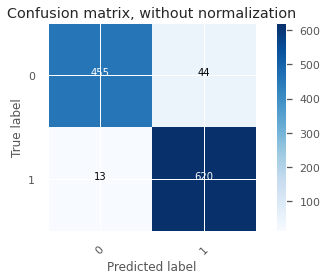

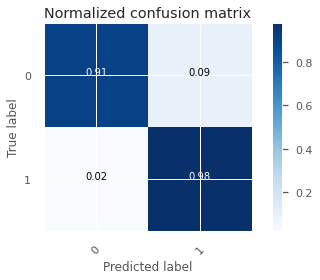

In [ ]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1],
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= [0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
#df[['Pclass'], ['Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(df)
df.info()

                          sessions  produktberater  product_views  \
visitor_id                                                          
6ea9ie2abab18utrq4z7b453 -0.505287             1.0            1.0   
6ea9ie2abab18utrq4z7b452 -0.602310             0.0            0.0   
878l5k67k957k87gewag6zf  -0.893380             1.0            2.0   
878l5k57k957k87m983745   -0.020171             1.0            3.0   
j8l5764795kouj87aw021m   -0.602310             1.0            2.0   
...                            ...             ...            ...   
lafkuz7f79ak96fkuz76     -1.087426             1.0            7.0   
lafkuz7f79ak96fkuz76     -1.087426             1.0            7.0   
laf26f79ak93fo3s5        -1.087426             1.0            7.0   
03gh26gh03ba2ab3gho3s9a  -1.087426             1.0            7.0   
laf26f79ak9lhpo3s5       -1.087426             1.0            7.0   

                          produktvideo  newsletter  eingeloeste_rabatte  \
visitor_id                 

Text(0.5, 0, 'Xgboost Feature Importance')

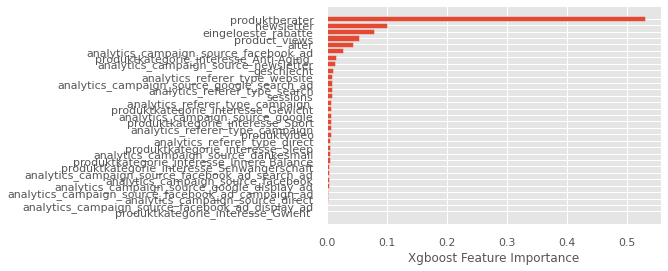

In [ ]:
# plt.figure(figsize=(8,12))
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 23.7 MB/s 


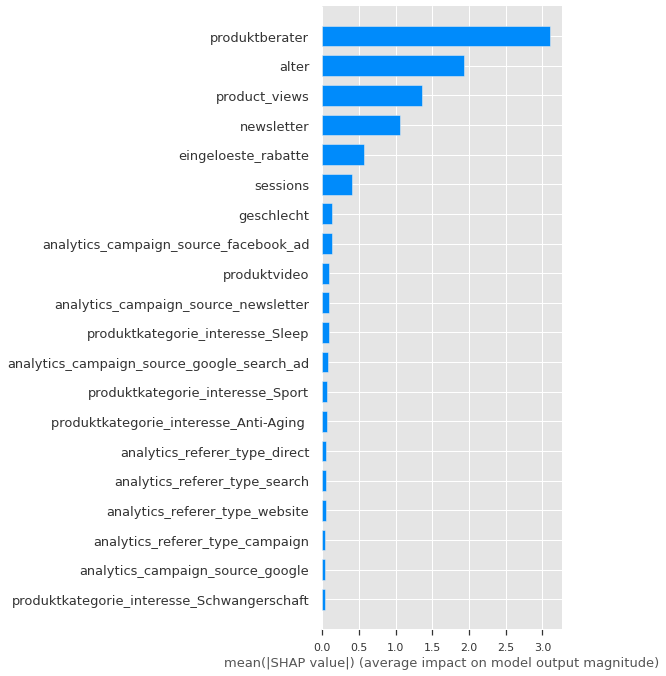

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")